 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [2]:
whale_file = Path("Resources/whale_returns.csv")
algo_file = Path("Resources/algo_returns.csv")
sp_tsx_file = Path("Resources/sp_tsx_history.csv")

In [3]:
whale_returns_df = pd.read_csv(whale_file, index_col = "Date", parse_dates = True, infer_datetime_format = True)
algo_returns_df = pd.read_csv(algo_file, index_col = "Date", parse_dates = True, infer_datetime_format = True)
sp_tsx_history_df = pd.read_csv(sp_tsx_file, index_col = "Date", parse_dates = True, infer_datetime_format = True)

In [4]:
# Reading whale returns
whale_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [5]:
# Count nulls
whale_returns_df.isnull().count()

SOROS FUND MANAGEMENT LLC      1060
PAULSON & CO.INC.              1060
TIGER GLOBAL MANAGEMENT LLC    1060
BERKSHIRE HATHAWAY INC         1060
dtype: int64

In [6]:
# Drop nulls
whale_returns_df = whale_returns_df.dropna().copy()

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [7]:
# Reading algorithmic returns
algo_returns_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [8]:
# Count nulls
algo_returns_df.isnull().count()

Algo 1    1241
Algo 2    1241
dtype: int64

In [9]:
# Drop nulls
algo_returns_df = algo_returns_df.dropna().copy()
algo_returns_df.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [10]:
# Reading S&P TSX 60 Closing Prices
sp_tsx_history_df.head()

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [11]:
# Check Data Types
sp_tsx_history_df.dtypes

Close    object
dtype: object

In [12]:
# Fix Data Types
sp_tsx_history_df = sp_tsx_history_df.replace({'\$': '', ',': ''}, regex=True)
sp_tsx = sp_tsx_history_df['Close'].astype(float).copy()

In [13]:
# Calculate Daily Returns
sp_tsx_history_df["Returns"] = sp_tsx.pct_change()
sp_tsx_history_df.head()

,Close,Returns
Date,,
2012-10-01,12370.19,NaN
2012-10-02,12391.23,0.001701
2012-10-03,12359.47,-0.002563
2012-10-04,12447.68,0.007137
2012-10-05,12418.99,-0.002305


In [14]:
# Drop nulls
sp_tsx_history_df = sp_tsx_history_df.dropna().copy()

In [15]:
# Rename `Close` Column to be specific to this portfolio.
sp_tsx_history_df.rename(columns = {"Close":"S&P Close"}, inplace = True)
sp_tsx_history_df.rename(columns = {"Returns":"S&P Returns"}, inplace = True)
sp_tsx_history_df.head()

,S&P Close,S&P Returns
Date,,
2012-10-02,12391.23,0.001701
2012-10-03,12359.47,-0.002563
2012-10-04,12447.68,0.007137
2012-10-05,12418.99,-0.002305
2012-10-09,12273.57,-0.011709


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [16]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
combine_df = pd.concat([whale_returns_df, algo_returns_df, sp_tsx_history_df], axis = "columns", join = "inner")
combine_df.drop(columns = "S&P Close", inplace = True)
combine_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P Returns
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555
...,...,...,...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

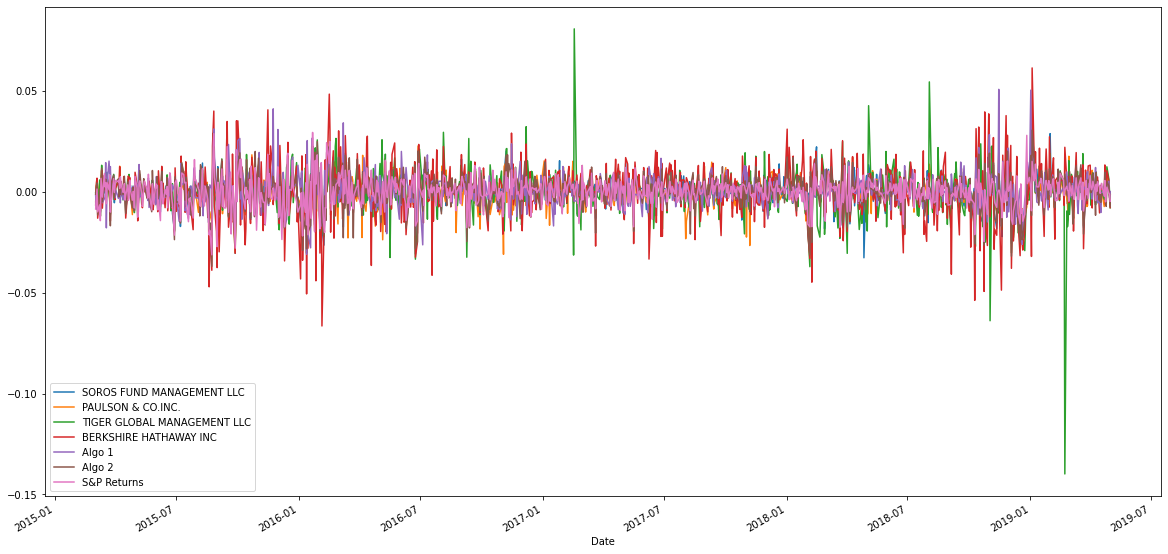

In [17]:
# Plot daily returns of all portfolios
combine_df.plot(figsize =(20,10))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

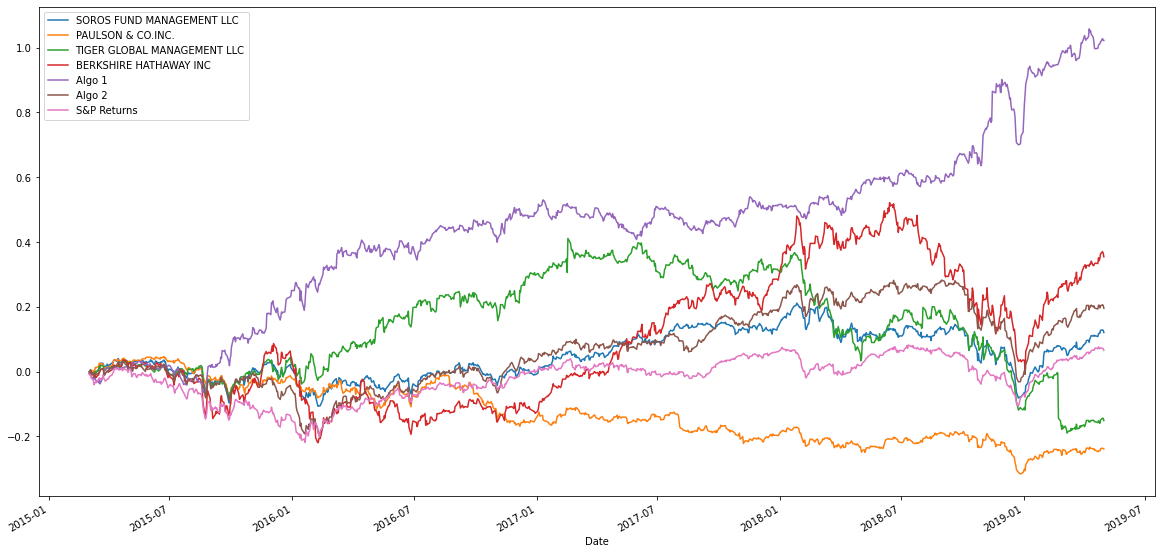

In [18]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combine_df).cumprod() - 1
# Plot cumulative returns
cumulative_returns.plot(figsize = (20,10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:>

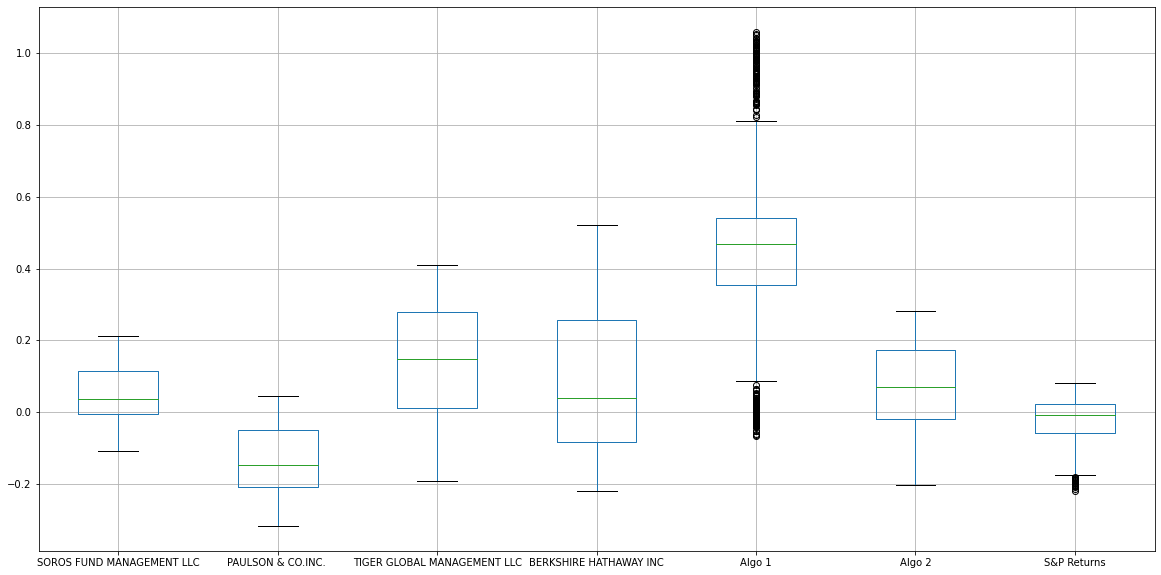

In [19]:
# Box plot to visually show risk
cumulative_returns.boxplot(figsize =(20,10))

### Calculate Standard Deviations

In [20]:
# Calculate the daily standard deviations of all portfolios
combine_std = combine_df.std()
combine_std

SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
Algo 1                         0.007589
Algo 2                         0.008326
S&P Returns                    0.007034
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [21]:
# Calculate  the daily standard deviation of S&P TSX 60
print(combine_std[6])
# Determine which portfolios are riskier than the S&P TSX 60
print(combine_std > combine_std["S&P Returns"])
print("Paulson & Co is the only portfolio that is less riskier than the S&P TSX")

0.007034167748577725
SOROS FUND MANAGEMENT LLC       True
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                          True
Algo 2                          True
S&P Returns                    False
dtype: bool
Paulson & Co is the only portfolio that is less riskier than the S&P TSX


### Calculate the Annualized Standard Deviation

In [22]:
# Calculate the annualized standard deviation (252 trading days)
combine_anualized_std = combine_std*np.sqrt(252)
combine_anualized_std

SOROS FUND MANAGEMENT LLC      0.124259
PAULSON & CO.INC.              0.110841
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
Algo 1                         0.120470
Algo 2                         0.132177
S&P Returns                    0.111664
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P TSX 60 using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

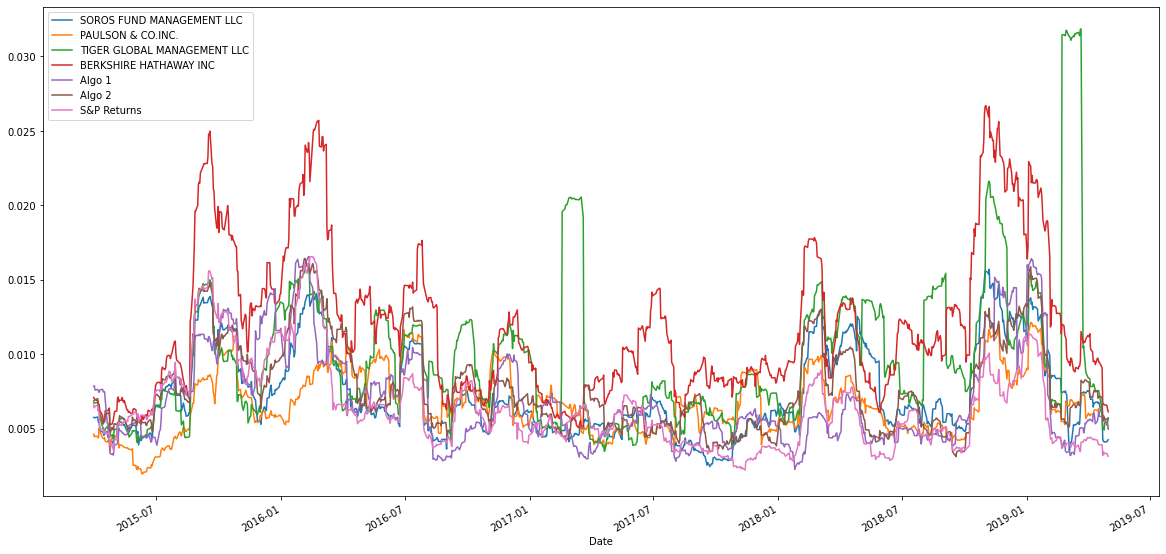

In [23]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
combine_df.rolling(window =21).std()
# Plot the rolling standard deviation
combine_df.rolling(window = 21).std().plot(figsize = (20,10))

### Calculate and plot the correlation

In [24]:
# Calculate the correlation
correlation = combine_df.corr()

# Display de correlation matrix
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P Returns
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310276
Algo 2,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,0.737370
S&P Returns,0.673930,0.486511,0.440583,0.557250,0.310276,0.737370,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

<AxesSubplot:xlabel='Date'>

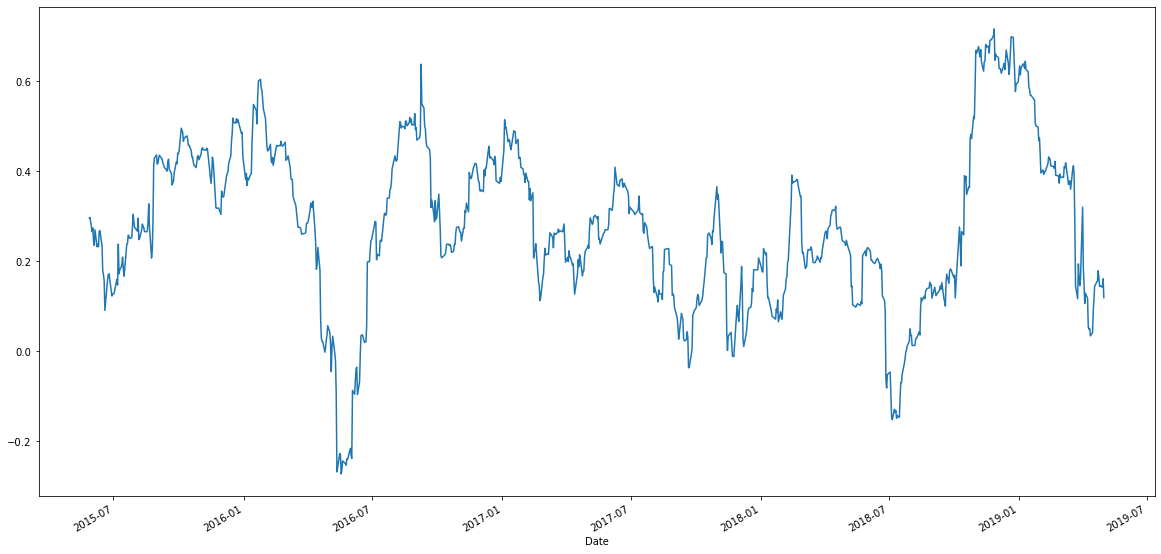

In [25]:
# Calculate covariance of a single portfolio
algo_1_cov= combine_df['Algo 1'].rolling(window = 60).cov(combine_df["S&P Returns"])
# Calculate variance of S&P TSX
sp_var = combine_df["S&P Returns"].rolling(window = 60).var()
# Computing beta
algo_1_beta = algo_1_cov/sp_var
# Plot beta trend
algo_1_beta.plot(figsize = (20,10))

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:xlabel='Date'>

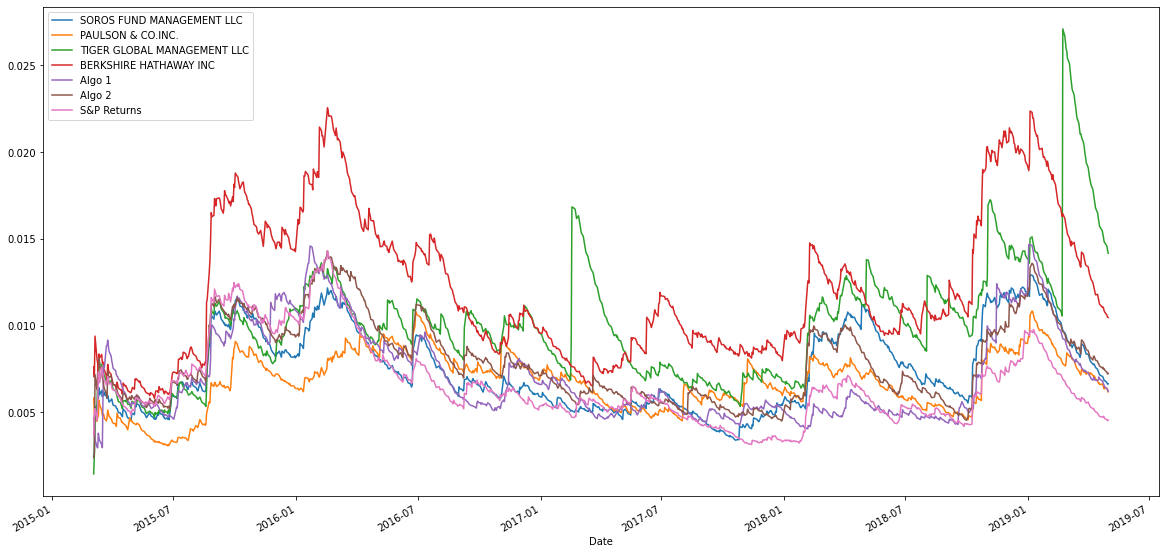

In [26]:
# Use `ewm` to calculate the rolling window
combine_ewm = combine_df.ewm(halflife = 21).std()
combine_ewm.plot(figsize = (20,10))

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [27]:
# Annualized Sharpe Ratios
e_r = combine_df.mean()*252
vol = combine_anualized_std

s_r = e_r/vol
print(s_r)

SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
S&P Returns                    0.195550
dtype: float64


<AxesSubplot:title={'center':'Sharpe Ratio'}>

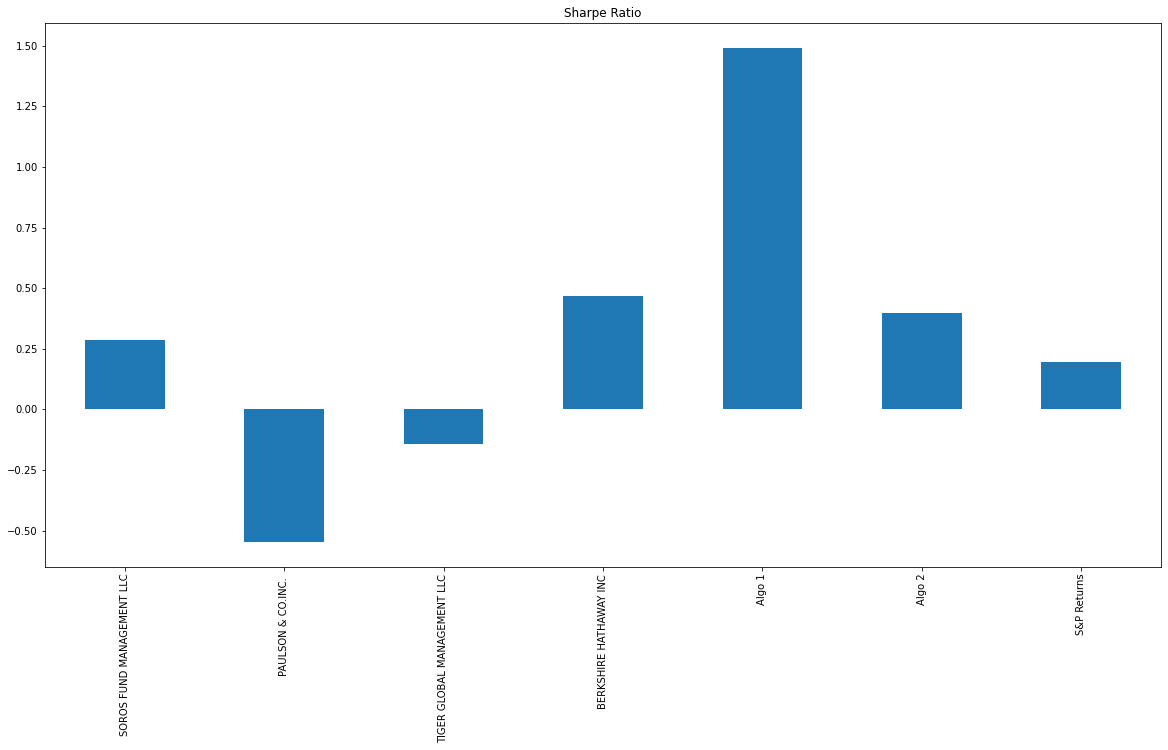

In [28]:
# Visualize the sharpe ratios as a bar plot
s_r.plot.bar(title = "Sharpe Ratio",figsize=(20,10))

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

Algo 1 out performs all other portfolios while Algo 2 does out perfrom the S&P it does not out perfrom Berkshire Hathaway

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P TSX 60 index.

* `SHOP` - [Shopify Inc](https://en.wikipedia.org/wiki/Shopify)

* `OTEX` - [Open Text Corporation](https://en.wikipedia.org/wiki/OpenText)

* `L` - [Loblaw Companies Limited](https://en.wikipedia.org/wiki/Loblaw_Companies)

In [29]:
# Reading data from 1st stock
shop_file = Path("Resources/BB.TO.csv")
bb_df = pd.read_csv(shop_file,index_col = "Date", parse_dates = True, infer_datetime_format = True)
bb_df.drop(columns = ["Open","High","Low","Adj Close","Volume"], inplace = True)
bb_df.rename(columns = {"Close":"BB Close"}, inplace = True)
bb_df.head()

,BB Close
Date,
2012-03-05,13.25
2012-03-06,13.15
2012-03-07,12.89
2012-03-08,13.11
2012-03-09,13.46


In [30]:
# Reading data from 2nd stock
enb_file = Path("Resources/ENB.TO.csv")
enb_df = pd.read_csv(enb_file, index_col = "Date", parse_dates = True, infer_datetime_format = True)
enb_df.drop(columns = ["Open","High","Low","Adj Close","Volume"], inplace = True)
enb_df.rename(columns = {"Close":"ENB Close"}, inplace = True)
enb_df.head()

,ENB Close
Date,
2012-03-05,38.330002
2012-03-06,37.799999
2012-03-07,38.110001
2012-03-08,38.250000
2012-03-09,38.610001


In [31]:
# Reading data from 3rd stock
t_file = Path("Resources/T.TO.csv")
t_df = pd.read_csv(t_file, index_col = "Date", parse_dates = True, infer_datetime_format = True)
t_df.drop(columns = ["Open","High","Low","Adj Close","Volume"], inplace = True)
t_df.rename(columns = {"Close":"T Close"}, inplace = True)
t_df.head()

,T Close
Date,
2012-03-05,14.3850
2012-03-06,14.3375
2012-03-07,14.2025
2012-03-08,14.1450
2012-03-09,14.2725


In [32]:
# Combine all stocks in a single DataFrame
port_df = pd.concat([t_df, enb_df, bb_df], axis = "columns", join = "inner")
port_df.head()

,T Close,ENB Close,BB Close
Date,,,
2012-03-05,14.3850,38.330002,13.25
2012-03-06,14.3375,37.799999,13.15
2012-03-07,14.2025,38.110001,12.89
2012-03-08,14.1450,38.250000,13.11
2012-03-09,14.2725,38.610001,13.46


In [33]:
# Reset Date index



In [34]:
# Reorganize portfolio data by having a column per symbol


In [35]:
# Calculate daily returns
port_returns = port_df.pct_change()
# Drop NAs
port_returns.dropna(inplace = True)
# Display sample data
port_returns.head()

,T Close,ENB Close,BB Close
Date,,,
2012-03-06,-0.003302,-0.013827,-0.007547
2012-03-07,-0.009416,0.008201,-0.019772
2012-03-08,-0.004049,0.003674,0.017067
2012-03-09,0.009014,0.009412,0.026697
2012-03-12,0.001051,0.002331,-0.030461


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

<AxesSubplot:xlabel='Date'>

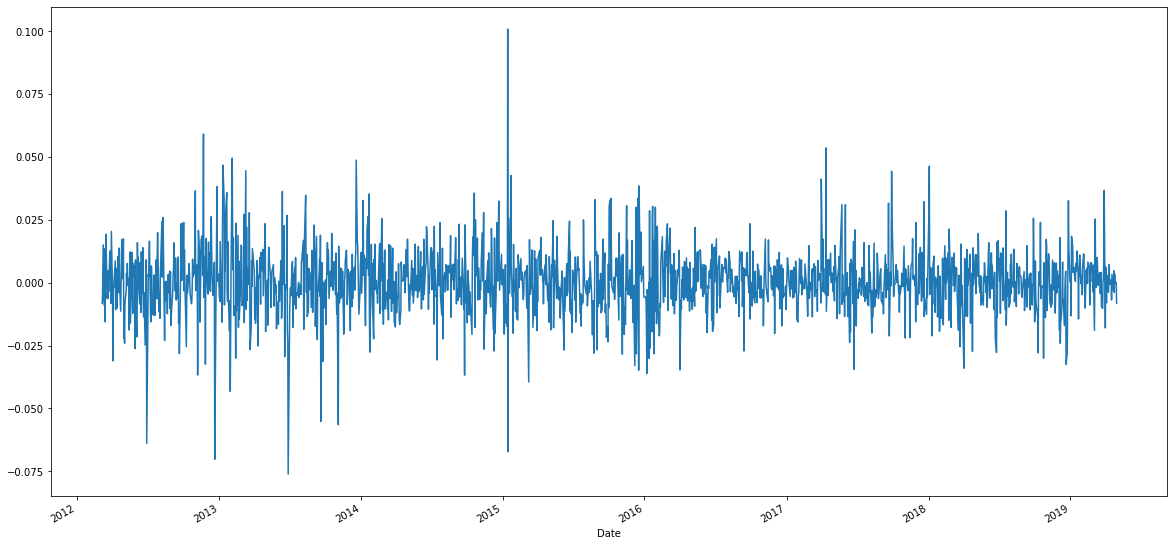

In [36]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
#port_cumulative_ret = (1+port_returns).cumprod() -1
port_weighted_ret = port_returns*weights
port_ret = port_weighted_ret.sum(axis=1)
#port_ret.rename(columns = {"0":"My Returns"}, inplace = True)
# Display sample data
port_ret.plot(figsize = (20,10))

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [37]:
# Join your returns DataFrame to the original returns DataFrame
all_returns = pd.concat([combine_df, port_ret], axis = "columns", join = "inner")
all_returns.rename(columns = {0:"My Returns"}, inplace = True)
all_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P Returns,My Returns
Date,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530,-0.004716
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371,-0.010099
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344,0.006827
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972,-0.001354
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555,-0.039510
...,...,...,...,...,...,...,...,...
2019-04-24,0.002284,0.001009,-0.004000,-0.006386,0.001095,0.000399,-0.004972,-0.003846
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628,0.003420
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254,-0.000042


In [38]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
all_returns.isnull()
all_returns = all_returns.dropna().copy()

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [39]:
# Calculate the annualized `std`
all_returns_std = all_returns.std()
all_returns_annualized = all_returns_std*np.sqrt(252)
all_returns_annualized

SOROS FUND MANAGEMENT LLC      0.124284
PAULSON & CO.INC.              0.110894
TIGER GLOBAL MANAGEMENT LLC    0.172799
BERKSHIRE HATHAWAY INC         0.203657
Algo 1                         0.120528
Algo 2                         0.132188
S&P Returns                    0.111693
My Returns                     0.178211
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Date'>

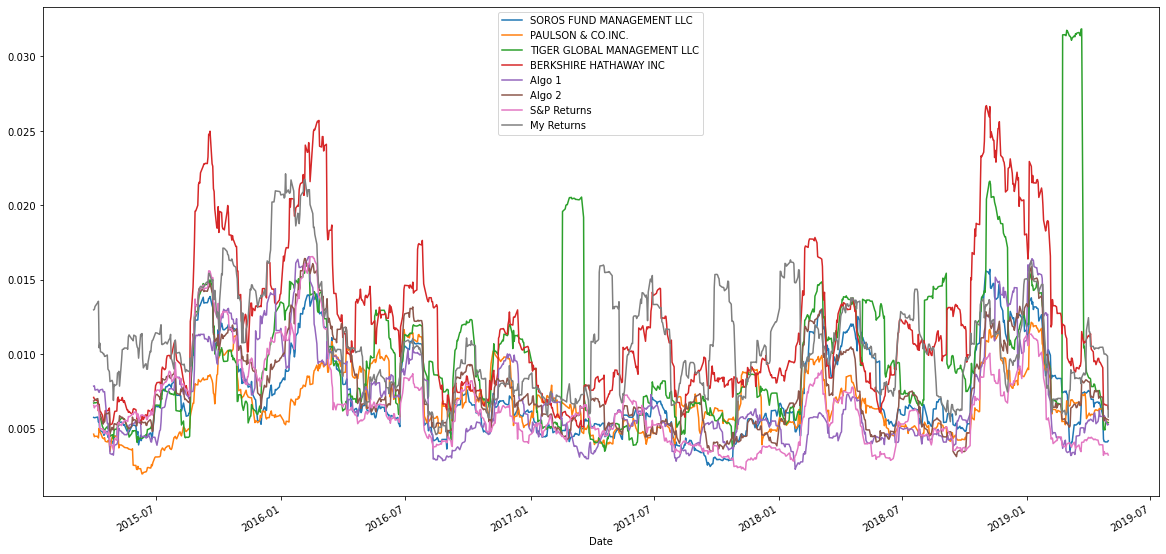

In [40]:
# Calculate rolling standard deviation
all_returns.rolling(window = 21).std()
# Plot rolling standard deviation
all_returns.rolling(window = 21).std().plot(figsize = (20,10))

### Calculate and plot the correlation

<AxesSubplot:>

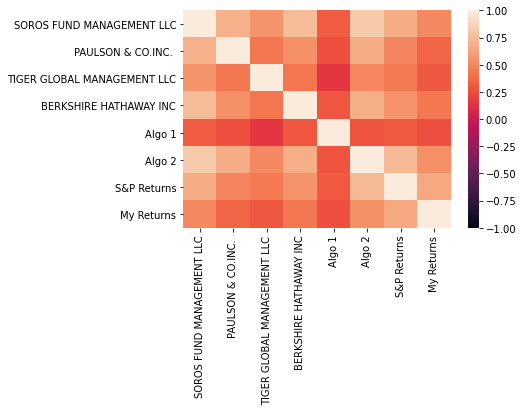

In [41]:
# Calculate and plot the correlation
ret_corr = all_returns.corr()
sns.heatmap(ret_corr, vmin=-1, vmax=1)

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

<AxesSubplot:xlabel='Date'>

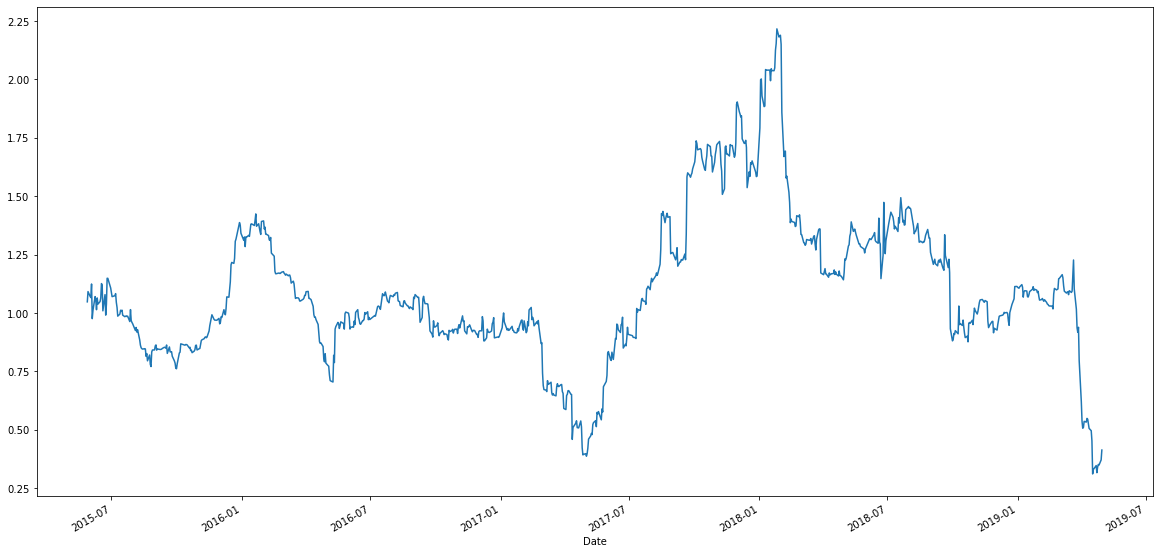

In [50]:
# Calculate and plot Beta
my_ret_cov = all_returns["My Returns"].rolling(window = 60).cov(all_returns["S&P Returns"].rolling(window = 60))
my_ret_var = all_returns["S&P Returns"].rolling(window = 60).var()
my_beta = my_ret_cov/my_ret_var
my_beta.plot(figsize = (20,10))

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [51]:
# Calculate Annualzied Sharpe Ratios
my_e_r = all_returns.mean()*252
my_vol = all_returns_annualized
my_s_r = my_e_r/my_vol
my_s_r

SOROS FUND MANAGEMENT LLC      0.298463
PAULSON & CO.INC.             -0.544902
TIGER GLOBAL MANAGEMENT LLC   -0.133303
BERKSHIRE HATHAWAY INC         0.476794
Algo 1                         1.492053
Algo 2                         0.410815
S&P Returns                    0.206011
My Returns                     0.087119
dtype: float64

<AxesSubplot:title={'center':'My Sharpe Ratio'}>

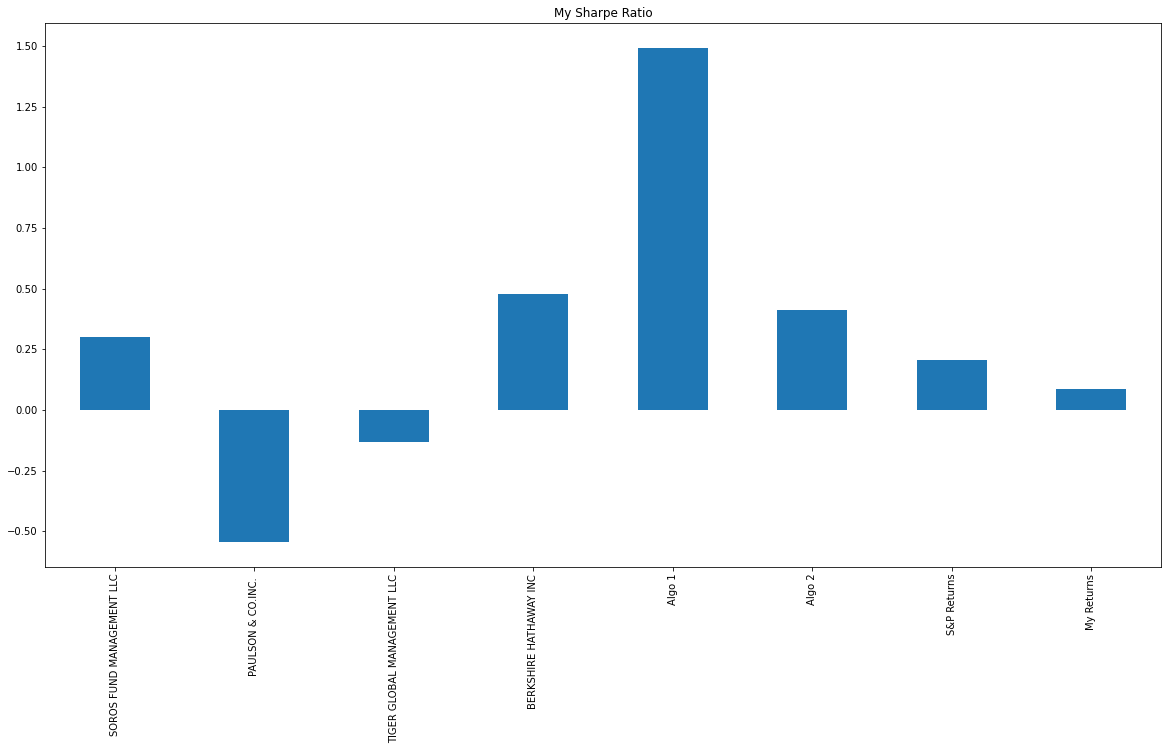

In [53]:
# Visualize the sharpe ratios as a bar plot
my_s_r.plot.bar(title = "My Sharpe Ratio",figsize = (20,10))

### How does your portfolio do?

Write your answer here!


Not terrible but it could be better, next time I would pull stocks that have growth and volitility compared to dividend payments